# Notebook: investigating the quality of our dataset

## Importing data

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import torch
import nd2
import json
from skimage.transform import resize

import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from data import config
from data.data import Data, load_datasets

config.ROOT_PATH = os.path.abspath(os.path.join('..')) # have to change since we are in notebooks subfolder

c:\Users\matis\.virtualenvs\mini-tumors-ruX1mXH1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = Data()

## Testing show_sample function

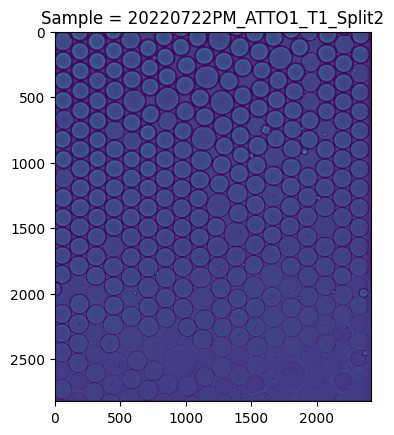

In [3]:
dataset.show_sample(1, channel = 3)

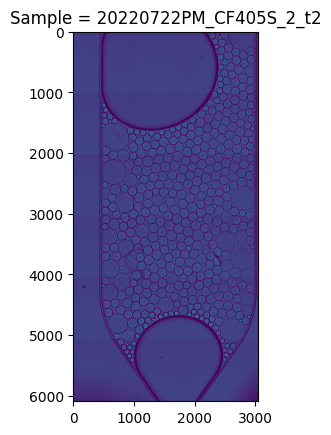

In [4]:
dataset.show_sample(10) # if we don't specify the channel, we will automatically look at the last channel (in this case 4)

## Investigating random droplets

label : 2


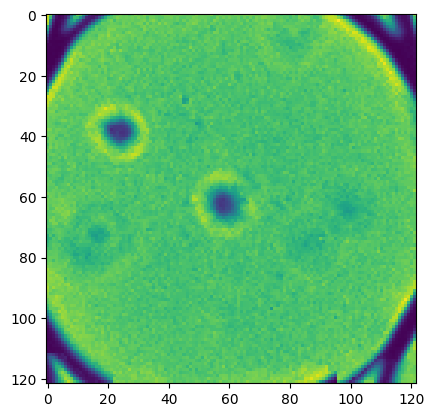

In [5]:
# Looking at one droplet in particular
idx = 1 # change this number according to which droplet we want to look at
img = np.load(f'{config.ROOT_PATH}/data/clean/img{idx}.npy')
plt.imshow(img[img.shape[0]-1,:,:])
print('label : ' + f'{dataset.labels[idx, 1]}')

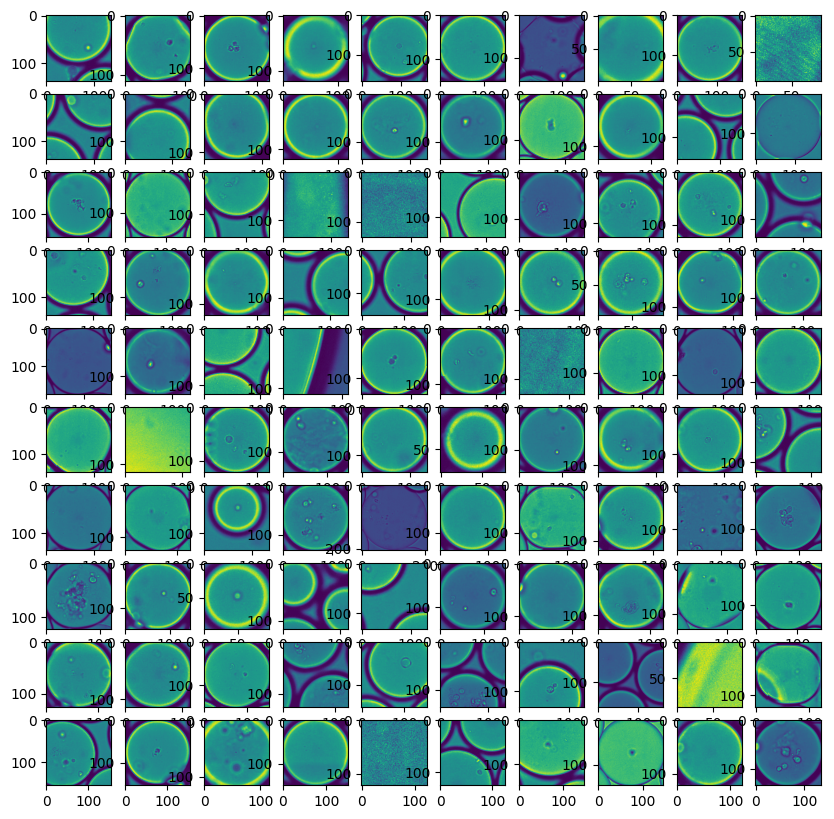

In [6]:
# Looking at 100 droplets RANDOMLY selected from the dataset
columns, rows = 10, 10 # can be changed to vary the number of droplets being investigated
np.random.seed(42) # set the seed
idxs = np.random.randint(1, len(dataset), 100)
fig = plt.figure(figsize=(10, 10))
fig_index = 1
for idx in idxs:
    img = np.load(f'{config.ROOT_PATH}/data/clean/img{idx}.npy')
    fig.add_subplot(rows, columns, fig_index)
    fig_index += 1
    plt.imshow(img[img.shape[0]-1,:,:])
plt.show()

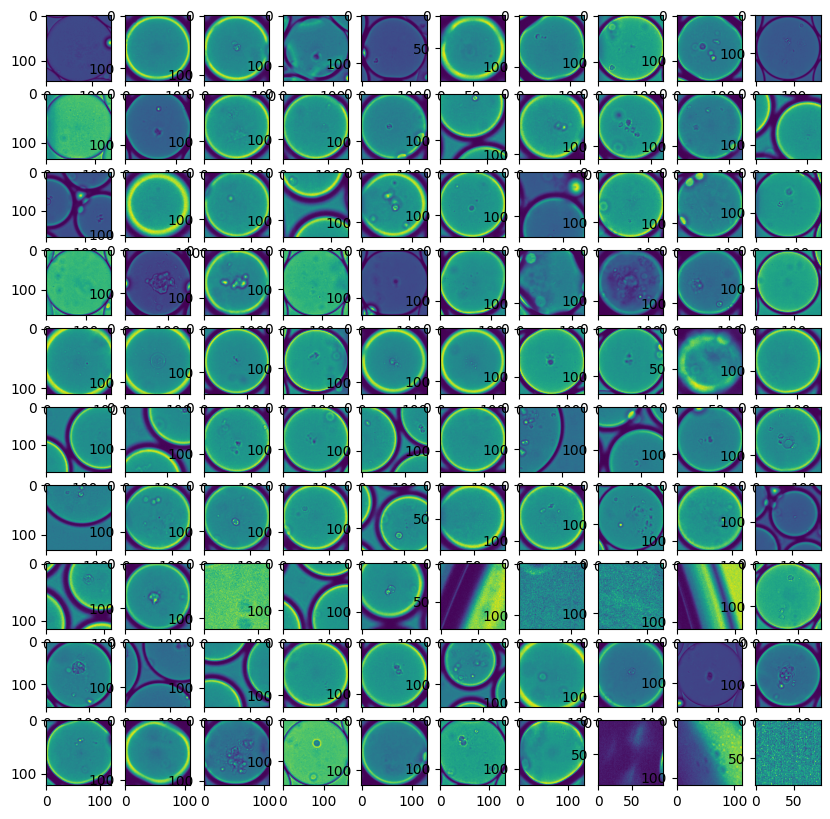

In [7]:
# Looking at 100 droplets UNIFORMLY selected over the dataset
columns, rows = 10, 10 # can be changed to vary the number of droplets being investigated
fig = plt.figure(figsize=(10, 10))
for idx in range(1, columns*rows+1):
    img = np.load(f'{config.ROOT_PATH}/data/clean/img{idx * (len(dataset) // (columns*rows))}.npy')
    fig.add_subplot(rows, columns, idx)
    plt.imshow(img[img.shape[0]-1,:,:])
plt.show()

## Label distribution / imbalance

In [8]:
import pandas as pd

pd.Series(dataset.labels[:, 1]).value_counts() / len(dataset) # distribution in percentage of data

# labels:
# 0 = empty/overcrowded
# 1 = all dead
# 2 = all alive
# 3 = 50/50

1    0.498974
0    0.295619
2    0.131525
3    0.073882
dtype: float64

## Impact of resizing images

In [9]:
idx = 1 # change this number according to which droplet we want to look at
img = np.load(f'{config.ROOT_PATH}/data/clean/img{idx}.npy')

label : 2


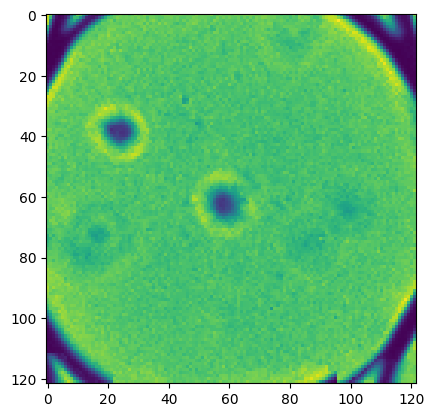

In [10]:
# Original image
plt.imshow(img[img.shape[0]-1,:,:])
print('label : ' + f'{dataset.labels[idx, 1]}')

label : 2


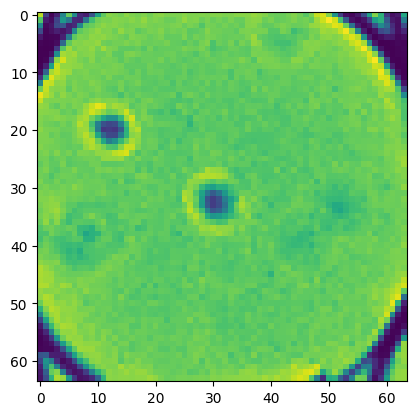

In [11]:
# Resized image (current setting is 64x64)
img = resize(img, (img.shape[0], config.IMG_SIZE[0], config.IMG_SIZE[1]), anti_aliasing=False)
plt.imshow(img[img.shape[0]-1,:,:])
print('label : ' + f'{dataset.labels[idx, 1]}')